In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("train.csv")
df_train['TrainORTest'] = 'Train'
df_train.tail()
#df_train.columns
#df_train.info()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TrainORTest
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,Train
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,Train
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,Train
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,Train
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2008,WD,Normal,147500,Train


<body link="#0563C1" vlink="#954F72" class=xl66 fontsize="1">

<table border=0 cellpadding=0 cellspacing=0 width=760 style='border-collapse:
 collapse;table-layout:fixed;width:570pt ; font-size: 9pt; '>
 <col class=xl66 width=123 style='mso-width-source:userset;mso-width-alt:3936;
 width:92pt'>
 <col class=xl66 width=637 style='mso-width-source:userset;mso-width-alt:20384;
 width:478pt'>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 width=123 style='height:15.75pt;width:92pt'>SalePrice</td>
  <td class=xl65 width=637 style='border-left:none;width:478pt'>不動産の販売価格（ドル単位）。これは予測しようとしているターゲット変数です。</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>MSSubClass</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>建物クラス</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>MSZoning</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>一般的なゾーニング分類</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>LotFrontage</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>敷地に接する道路の長さ(フィート)</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>LotArea</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>敷地面積（平方フィート）</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>Street</td>
  <td class=xl65 style='border-top:none;border-left:none'>道路アクセスの種類</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>Alley</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>路地へのアクセスの種類</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>LotShape</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>土地の一般的な形状</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>LandContour</td>
  <td class=xl65 style='border-top:none;border-left:none'>土地の平坦度</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>Utilities</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>利用可能なユーティリティの種類</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>LotConfig</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>ロット構成</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>LandSlope</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>土地の傾斜</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>Neighborhood</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>エイムズ市域内の物理的な場所</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>Condition1</td>
  <td class=xl65 style='border-top:none;border-left:none'>幹線道路や鉄道に近い</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>Condition2</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>主要道路または鉄道への近さ（2番目が存在する場合）</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>BldgType</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>住居の種類</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>HouseStyle</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>住居のスタイル</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>OverallQual</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>全体的な素材と仕上げの品質</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>OverallCond</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>全体的な状態評価</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>YearBuilt</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>当初の建設日</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>YearRemodAdd</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>改装日</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>RoofStyle</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>屋根の種類</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>RoofMatl</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>屋根材</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>Exterior1st</td>
  <td class=xl65 style='border-top:none;border-left:none'>家の外装</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>Exterior2nd</td>
  <td class=xl65 style='border-top:none;border-left:none'>家の外装材（複数の素材がある場合）</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>MasVnrType</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>石積みベニヤタイプ</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>MasVnrArea</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>石積みベニヤ面積（平方フィート）</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>ExterQual</td>
  <td class=xl65 style='border-top:none;border-left:none'>外装材の品質</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>ExterCond</td>
  <td class=xl65 style='border-top:none;border-left:none'>外装材の現状</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>Foundation</td>
  <td class=xl65 style='border-top:none;border-left:none'>基礎の種類</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>BsmtQual</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>地下室の高さ</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>BsmtCond</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>地下室の一般的な状態</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>BsmtExposure</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>ウォークアウトまたはガーデンレベルの地下室の壁</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>BsmtFinType1</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>地下室の仕上げエリアの品質</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>BsmtFinSF1</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>タイプ 1 完成平方フィート</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>BsmtFinType2</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>2番目の仕上げ領域の品質（存在する場合）</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>BsmtFinSF2</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>タイプ 2 完成平方フィート</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>BsmtUnfSF</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>地下室の未完成面積（平方フィート）</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>TotalBsmtSF</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>地下室の総面積（平方フィート）</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>Heating</td>
  <td class=xl65 style='border-top:none;border-left:none'>暖房の種類</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>HeatingQC</td>
  <td class=xl65 style='border-top:none;border-left:none'>暖房の品質と状態</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>CentralAir</td>
  <td class=xl65 style='border-top:none;border-left:none'>セントラルエアコン</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>Electrical</td>
  <td class=xl65 style='border-top:none;border-left:none'>電気システム</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>1stFlrSF</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>1階の面積（平方フィート）</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>2ndFlrSF</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>2階の面積（平方フィート）</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>LowQualFinSF</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>低品質仕上げ平方フィート（全フロア）</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>GrLivArea</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>地上居住面積（平方フィート）</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>BsmtFullBath</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>地下のフルバスルーム</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>BsmtHalfBath</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>地下のハーフバスルーム</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>FullBath</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>地上にフルバスルームあり</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>HalfBath</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>地上にあるハーフバス</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>Bedroom</td>
  <td class=xl65 style='border-top:none;border-left:none'>地下階より上の寝室の数</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>Kitchen</td>
  <td class=xl65 style='border-top:none;border-left:none'>キッチンの数</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>KitchenQual</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>キッチン品質</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>TotRmsAbvGrd</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>地上にある部屋の合計数（バスルームは含みません）</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>Functional</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>ホーム機能評価</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>Fireplaces</td>
  <td class=xl65 style='border-top:none;border-left:none'>暖炉の数</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>FireplaceQu</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>暖炉の品質</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>GarageType</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>ガレージの場所</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>GarageYrBlt</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>ガレージが建てられた年</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>GarageFinish</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>ガレージの内装仕上げ</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>GarageCars</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>車の収容能力におけるガレージのサイズ</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>GarageArea</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>ガレージの面積（平方フィート）</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>GarageQual</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>ガレージの品質</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>GarageCond</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>ガレージの状態</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>PavedDrive</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>舗装された私道</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>WoodDeckSF</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>ウッドデッキの面積（平方フィート）</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>OpenPorchSF</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>オープンポーチ面積（平方フィート）</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>EnclosedPorch</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>囲い付きポーチの面積（平方フィート）</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>3SsnPorch</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>3シーズンポーチの面積（平方フィート）</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>ScreenPorch</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>スクリーンポーチの面積（平方フィート）</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>PoolArea</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>プール面積（平方フィート）</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>PoolQC</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>プールの品質</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>Fence</td>
  <td class=xl65 style='border-top:none;border-left:none'>フェンスの品質</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>MiscFeature</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>他のカテゴリに含まれないその他の機能</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>MiscVal</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>その他の機能の$値</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>MoSold</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>販売月</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>YrSold</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>販売年</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>SaleType</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>販売の種類</td>
 </tr>
 <tr class=xl66 height=21 style='height:15.75pt'>
  <td height=21 class=xl65 style='height:15.75pt;border-top:none'>SaleCondition</td>
  <td class=xl65 style='border-top:none;border-left:none'><span
  style='mso-spacerun:yes'>&nbsp;</span>販売条件</td>
 </tr>
 <![if supportMisalignedColumns]>
 <tr height=0 style='display:none'>
  <td width=123 style='width:92pt'></td>
  <td width=637 style='width:478pt'></td>
 </tr>
 <![endif]>
</table>

</body>


In [3]:
df_test = pd.read_csv("test.csv")
df_test['TrainORTest'] = 'Test'
df_test['SalePrice'] = 9999999999
df_test.columns
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TrainORTest,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,Test,9999999999
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,Test,9999999999
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,Test,9999999999
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,Test,9999999999
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,Normal,Test,9999999999


In [11]:
# 2つのリスト
list1 = df_train.columns
list2 = df_test.columns

# list1にのみ含まれる要素
only_in_list1 = list(set(list1) - set(list2))

# list2にのみ含まれる要素
only_in_list2 = list(set(list2) - set(list1))

# 結果を表示
print("list1にのみ含まれる要素:", only_in_list1)
print("list2にのみ含まれる要素:", only_in_list2)

list1にのみ含まれる要素: []
list2にのみ含まれる要素: []


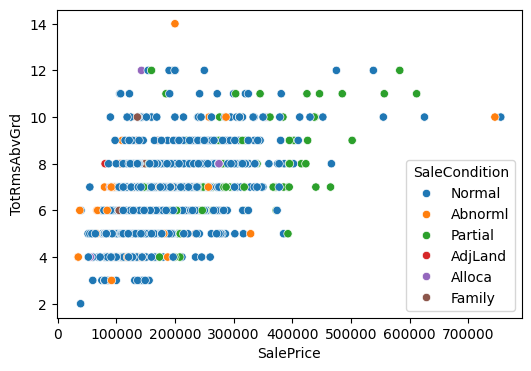

In [5]:
plt.figure(figsize=(6,4))
#sns.scatterplot(df_train,x='SalePrice',y='GrLivArea', hue='SaleCondition') # 地上居住面積（平方フィート）
#sns.scatterplot(df_train,x='SalePrice',y='LotArea', hue='SaleCondition') # 敷地面積（平方フィート）
sns.scatterplot(df_train,x='SalePrice',y='TotRmsAbvGrd', hue='SaleCondition') # 地上にある部屋の合計数
plt.show()

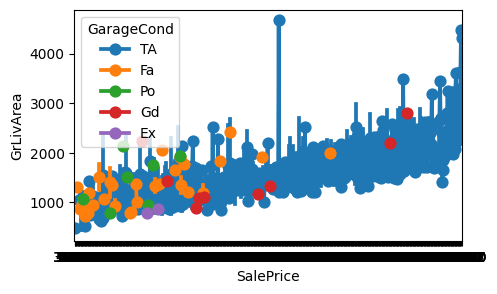

In [6]:
plt.figure(figsize=(5,3))
sns.pointplot(df_train, x="SalePrice", y='GrLivArea' , hue='GarageCond')
plt.show()

In [7]:
df_tmp = pd.concat([df_train, df_test ], axis=0).reset_index(drop=True) #dfの連結
df_comb = df_tmp.drop(columns=["Alley", "MasVnrType", "MasVnrArea"])

pd.options.display.max_rows = 500
#pd.options.display.max_rows = 999
pd.options.display.max_rows


# グラフ描画
#df_gp = df_comb.groupby("KitchenQual")["Id"]
#tmp = (df_gp.count())
#print(df_gp)
#print(tmp)
#tmp.plot(kind='bar', figsize=(3, 2))

500

In [8]:
#欠損値の確認
df_train.isnull().sum()[df_train.isnull().sum()>0].sort_values(ascending=True)

Electrical         1
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [9]:
df_test.isnull().sum()[df_train.isnull().sum()>0].sort_values(ascending=True)

Electrical         0
MasVnrArea        15
BsmtFinType1      42
BsmtFinType2      42
BsmtQual          44
BsmtExposure      44
BsmtCond          45
GarageType        76
GarageCond        78
GarageQual        78
GarageFinish      78
GarageYrBlt       78
LotFrontage      227
FireplaceQu      730
MasVnrType       894
Fence           1169
Alley           1352
MiscFeature     1408
PoolQC          1456
dtype: int64

In [10]:
na_col_list = df_comb.isnull().sum()[df_comb.isnull().sum()>0].index.tolist()
df_comb[na_col_list].dtypes.sort_values()

BsmtFullBath    float64
LotFrontage     float64
TotalBsmtSF     float64
BsmtUnfSF       float64
GarageArea      float64
GarageCars      float64
BsmtHalfBath    float64
BsmtFinSF1      float64
GarageYrBlt     float64
BsmtFinSF2      float64
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageCond       object
PoolQC           object
Fence            object
GarageQual       object
Functional       object
MSZoning         object
MiscFeature      object
Electrical       object
BsmtFinType2     object
BsmtFinType1     object
BsmtExposure     object
BsmtCond         object
BsmtQual         object
Exterior2nd      object
Exterior1st      object
Utilities        object
KitchenQual      object
SaleType         object
dtype: object